In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as lines
import numpy as np
from sklearn.linear_model import LinearRegression
import math
font_size = 60
label_size = 52
legend_size = 65
up_time_ratio_label = 'up-time ratio'
actr_labels = [up_time_ratio_label, 'round', 'entropy_n', 'goal_rate', 'skill',]
rl_labels = [  up_time_ratio_label,  'round', 'entropy_n', 'goal_rate']
bottom_actr_labels = ['entropy_n', 'goal_rate', 'skill',]
bottom_rl_labels = [ 'entropy_n', 'goal_rate']
rewards = [2, 6, 10, 14, 18]
actr_xlist = [2, 6, 10, 14, 18]
rl_xlist = [0.1, 0.3, 0.5, 0.7, 0.9]

In [2]:
def LoadCsvWithMapSize(csv_names):
    df = pd.DataFrame(index=None)
    for csv_name in csv_names:
        df_csv = pd.read_csv(csv_name[0])
        df_csv['map_size'] = [csv_name[1]] * len(df_csv)
        df = df.append(df_csv)
            
    return df

In [3]:
def draw_conventional_graph(df, ax, color, label,x_list, rewards, col_name, map_size,map_no_min, map_no_max, sd_rate, ylim):
    group = df.groupby(['map_size', 'reward'])
    df_mean = group.mean()
    y_list = []
    ax.grid()
    for reward in rewards:
        m = df_mean.loc[map_size, reward].at[col_name]
        y_list.append(m)
    y_each_map_sd_mean = calc_each_map_sd_mean(df, map_size, map_no_min, map_no_max, rewards, col_name, sd_rate)
    ax.errorbar(x_list, y_list, yerr = y_each_map_sd_mean, color=color, label=label, capsize=3)
    
    ax.set_ylim(ylim)

In [4]:
def calc_each_map_sd_mean(df, map_size, map_no_min, map_no_max, rewards, col_name, sd_rate):
    sd_mean = []
    group_sd = df.groupby(["map_size", 'map_no', 'reward']).std()
    map_num = map_no_max - map_no_min + 1
    for reward in rewards:
        sd_sum = 0
        for map_no in range(map_no_min, map_num):
            sd_sum += group_sd.loc[map_size, map_no, reward].at[col_name]
        sd_mean.append(sd_sum / map_num * sd_rate)
    return sd_mean

In [5]:
def draw_actr_graphs(df, axes, labels, x_list, rewards, colors, levels, names, ylims):
    for ax, label, ylim in zip(axes, labels, ylims):
        for l, c, n in zip(levels, colors, names):
            draw_conventional_graph(df, ax, c, n, x_list, rewards, label, l,0, 9, 1.0/10, ylim)
            ax.tick_params(labelsize=label_size)    
            ax.legend(fontsize=legend_size)

In [6]:
def SetSpines(axes, spines):
    for ax in axes:
        ax.spines["top"].set_linewidth(spines)
        ax.spines["left"].set_linewidth(spines)
        ax.spines["bottom"].set_linewidth(spines)
        ax.spines["right"].set_linewidth(spines)

In [7]:
def LoadCsvWithMapSize(csv_names):
    df = pd.DataFrame(index=None)
    for csv_name in csv_names:
        df_csv = pd.read_csv(csv_name[0])
        df_csv['map_size'] = [csv_name[1]] * len(df_csv)
        df = df.append(df_csv)
            
    return df

In [19]:
i_11_11 = "instance_ct_11_11_10_2_4_5_180.csv"
i_9_9 = "instance_ct_9_9_10_2_4_5_180.csv"
i_7_7 = "instance_ct_7_7_10_2_4_5_180.csv"

b_11_11 = "backtrack_ct_11_11_10_2_4_5_180.csv"
b_9_9 = "backtrack_ct_9_9_10_2_4_5_180.csv"
b_7_7 = "backtrack_ct_7_7_10_2_4_5_180.csv"

r_11_11 = "random_n_11_11_10_2_4_5_180.csv"
r_9_9 = "random_n_9_9_10_2_4_5_180.csv"
r_7_7 = "random_n_7_7_10_2_4_5_180.csv"

rl_11_11 = "11_11.csv"
rl_9_9 = "9_9.csv"
rl_7_7 = "7_7.csv"

df_i = LoadCsvWithMapSize([(i_11_11, 3), (i_9_9, 2), (i_7_7, 1)])
df_b = LoadCsvWithMapSize([(b_11_11, 3), (b_9_9, 2), (b_7_7, 1)])
df_r = LoadCsvWithMapSize([(r_11_11, 3), (r_9_9, 2), (r_7_7, 1)])
df_rl = LoadCsvWithMapSize([(rl_11_11, 3), (rl_9_9, 2), (rl_7_7, 1)])

In [20]:
df_i[up_time_ratio_label] = df_i['giveup_time'] / 3600.0 
df_b[up_time_ratio_label] = df_b['giveup_time'] / 3600.0 
df_r[up_time_ratio_label] = df_r['giveup_time'] / 3600.0 
df_rl[up_time_ratio_label] = df_rl['steps'] / 3600.0 

In [9]:
df_r5 = pd.read_csv('random_n_7_7_10_2_4_5_180.csv')
df_b5 = pd.read_csv('backtrack_ct_7_7_10_2_4_5_180.csv')
df_i5 = pd.read_csv('instance_ct_7_7_10_2_4_5_180.csv')

df_r7 = pd.read_csv('random_n_9_9_10_2_4_5_180.csv')
df_b7 = pd.read_csv('backtrack_ct_9_9_10_2_4_5_180.csv')
df_i7 = pd.read_csv('instance_ct_9_9_10_2_4_5_180.csv')

df_r9 = pd.read_csv('random_n_11_11_10_2_4_5_180.csv')
df_b9 = pd.read_csv('backtrack_ct_11_11_10_2_4_5_180.csv')
df_i9 = pd.read_csv('instance_ct_11_11_10_2_4_5_180.csv')

df_r5['give_up_time_ratio'] = df_r5['giveup_time'] / 3600.0
df_b5['give_up_time_ratio'] = df_b5['giveup_time'] / 3600.0
df_i5['give_up_time_ratio'] = df_i5['giveup_time'] / 3600.0

df_r7['give_up_time_ratio'] = df_r7['giveup_time'] / 3600.0
df_b7['give_up_time_ratio'] = df_b7['giveup_time'] / 3600.0
df_i7['give_up_time_ratio'] = df_i7['giveup_time'] / 3600.0

df_r9['give_up_time_ratio'] = df_r9['giveup_time'] / 3600.0
df_b9['give_up_time_ratio'] = df_b9['giveup_time'] / 3600.0
df_i9['give_up_time_ratio'] = df_i9['giveup_time'] / 3600.0

In [10]:
df_r[df_r['reward'] == 2]

,map_no,reward,round,skill,goal_time,goal_rate,entropy,entropy_n,achivenmt_time,giveup_time,probability,path,map_size
0,0,2,5,1214,1,0.200000,2.361883,0.775781,165.455000,885.455,0.036744692433315185:0.04300489929232444:0.001...,['False1:5:1:5:1:2:6:7:6:7:6:9:6:7:6:2:6:9:6:7...,3
1,0,2,3,326,3,1.000000,2.229644,0.732346,82.266333,246.799,0.07511045655375552:0.0780559646539028:0.0:0.0...,['True1:2:6:2:1:2:6:2:1:2:1:5:1:2:1:5:1:5:1:2:...,3
2,0,2,5,114,5,1.000000,2.468902,0.810932,21.017000,105.085,0.1865671641791045:0.06716417910447761:0.00746...,['True1:5:1:5:1:5:1:5:1:5:1:2:1:5:1:5:1:5:1:2:...,3
3,0,2,3,453,1,0.333333,2.735618,0.898538,39.606000,399.606,0.06361323155216285:0.11323155216284987:0.0597...,['True1:5:1:5:1:5:1:5:1:2:6:2:1:2:6:2:6:2:1:2:...,3
4,0,2,4,666,2,0.500000,2.616402,0.859380,66.277000,492.554,0.05286024619840695:0.05503258508327299:0.0231...,['True1:5:1:2:6:2:6:2:1:5:1:5:1:2:1:5:1:2:6:7:...,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,9,2,4,108,4,1.000000,1.737515,0.790777,19.083250,76.333,0.1513157894736842:0.375:0.23684210526315788:0...,['True1:2:3:2:3:2:1:2:1:2:1:2:3:2:3:2:3:2:3:2:...,1
456,9,2,4,118,4,1.000000,1.874002,0.852895,23.426250,93.705,0.06321839080459771:0.3103448275862069:0.18965...,['True1:2:3:2:1:2:3:2:3:2:1:2:3:2:3:2:3:2:1:2:...,1
457,9,2,5,401,5,1.000000,1.794300,0.816621,62.205200,311.026,0.09380234505862646:0.3082077051926298:0.22278...,['True1:2:3:2:3:2:5:6:9:6:9:6:5:6:5:2:3:2:3:2:...,1
458,9,2,4,226,4,1.000000,1.758867,0.800495,48.546000,194.184,0.04468085106382979:0.14468085106382977:0.0510...,['True1:2:3:2:1:2:1:2:3:2:3:2:5:6:9:6:5:6:5:2:...,1


In [13]:
def show_graph_models(df_r, df_b, df_i):
    fig, axes= plt.subplots(1,5, figsize=(25,5))
    n = len(df_r)
    
    for df, label in zip([df_r, df_b, df_i], ['Random', 'DFS', 'DFS+IBL']):
        group = df.groupby(['reward'], as_index=False)
        x = group.mean(numeric_only=True)['reward'].to_numpy()
        m = group.mean(numeric_only=True)
        std = group.std()
        axes[0].errorbar(x, m['give_up_time_ratio'], yerr=std['give_up_time_ratio'] / math.sqrt(n), capsize=3, label=label)
        axes[0].set_ylim([0.0, 1.0])
        axes[0].set_title('Total Time Ratio')
        axes[1].errorbar(x, m['round'], yerr=std['round'] / math.sqrt(n), capsize=3, label=label)
        axes[1].set_title('Round Num')
        axes[1].set_yscale('log')
        axes[1].set_ylim([1, 100])    
        axes[2].errorbar(x, m['entropy_n'], yerr=std['entropy_n'] / math.sqrt(n), capsize=3, label=label)
        axes[2].set_title('Entropy')
        axes[2].set_ylim([0.1, 0.9])    
        axes[3].errorbar(x, m['goal_rate'], yerr=std['goal_rate'] / math.sqrt(n), capsize=3, label=label)
        axes[3].set_title('Goal Rate')
        axes[3].set_ylim([0.0, 1.0])    
        axes[4].errorbar(x, m['skill'], yerr=std['skill'] / math.sqrt(n), capsize=3, label=label)
        axes[4].set_title('Number of Productions')    
        axes[4].set_ylim([100, 1000])    
    
    axes[1].set_yscale('log')
    axes[4].set_yscale('log')
    
    for ax in axes:
        ax.legend()
        ax.grid()
    plt.show()

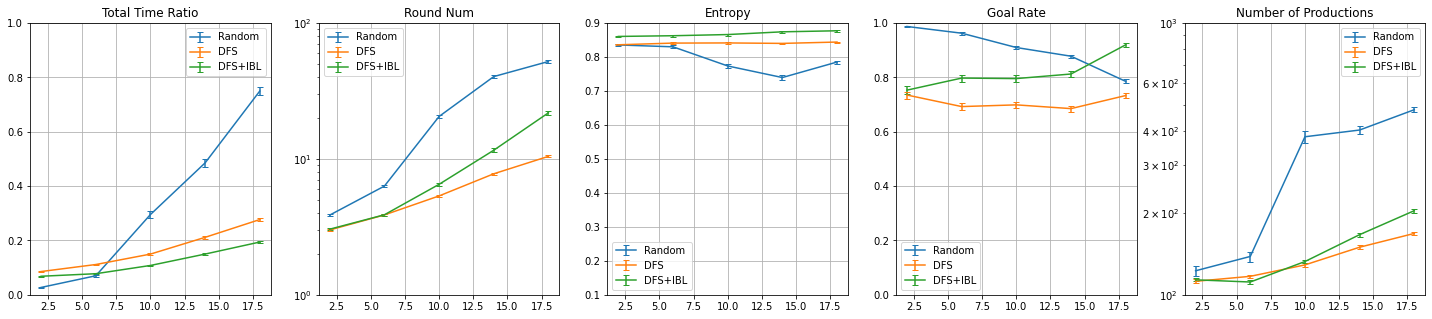

In [14]:
show_graph_models(df_r5, df_b5, df_i5)

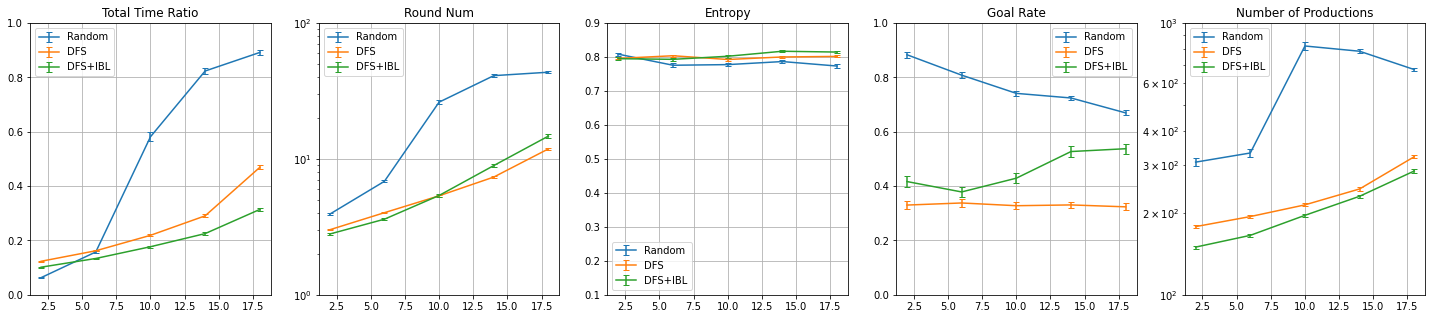

In [15]:
show_graph_models(df_r7, df_b7, df_i7)

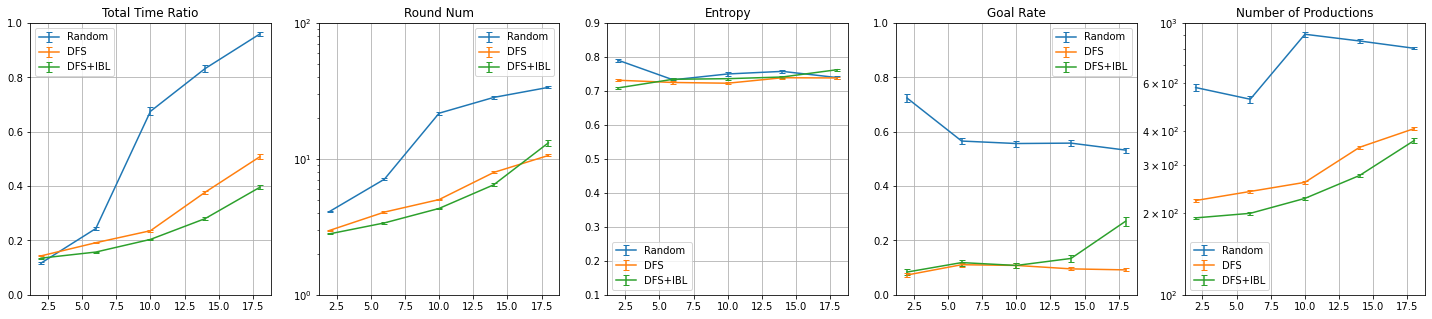

In [16]:
show_graph_models(df_r9, df_b9, df_i9)

In [ ]:
df_i[up_time_ratio_label] = df_i['giveup_time'] / 3600.0 
df_b[up_time_ratio_label] = df_b['giveup_time'] / 3600.0 
df_r[up_time_ratio_label] = df_r['giveup_time'] / 3600.0 
df_rl[up_time_ratio_label] = df_rl['steps'] / 3600.0 

In [ ]:
df_i_temp = df_i.drop(columns=['entropy', 'probability', 'path', 'map_no', 'giveup_time', 'achivenmt_time', 'goal_time'])
df_b_temp = df_b.drop(columns=['entropy', 'probability', 'path', 'map_no', 'giveup_time', 'achivenmt_time', 'goal_time'])
df_r_temp = df_r.drop(columns=['entropy', 'probability', 'path', 'map_no', 'giveup_time', 'achivenmt_time', 'goal_time'])
df_r_temp.to_csv('df_r.csv')
df_b_temp.to_csv('df_b.csv')
df_i_temp.to_csv('df_i.csv')

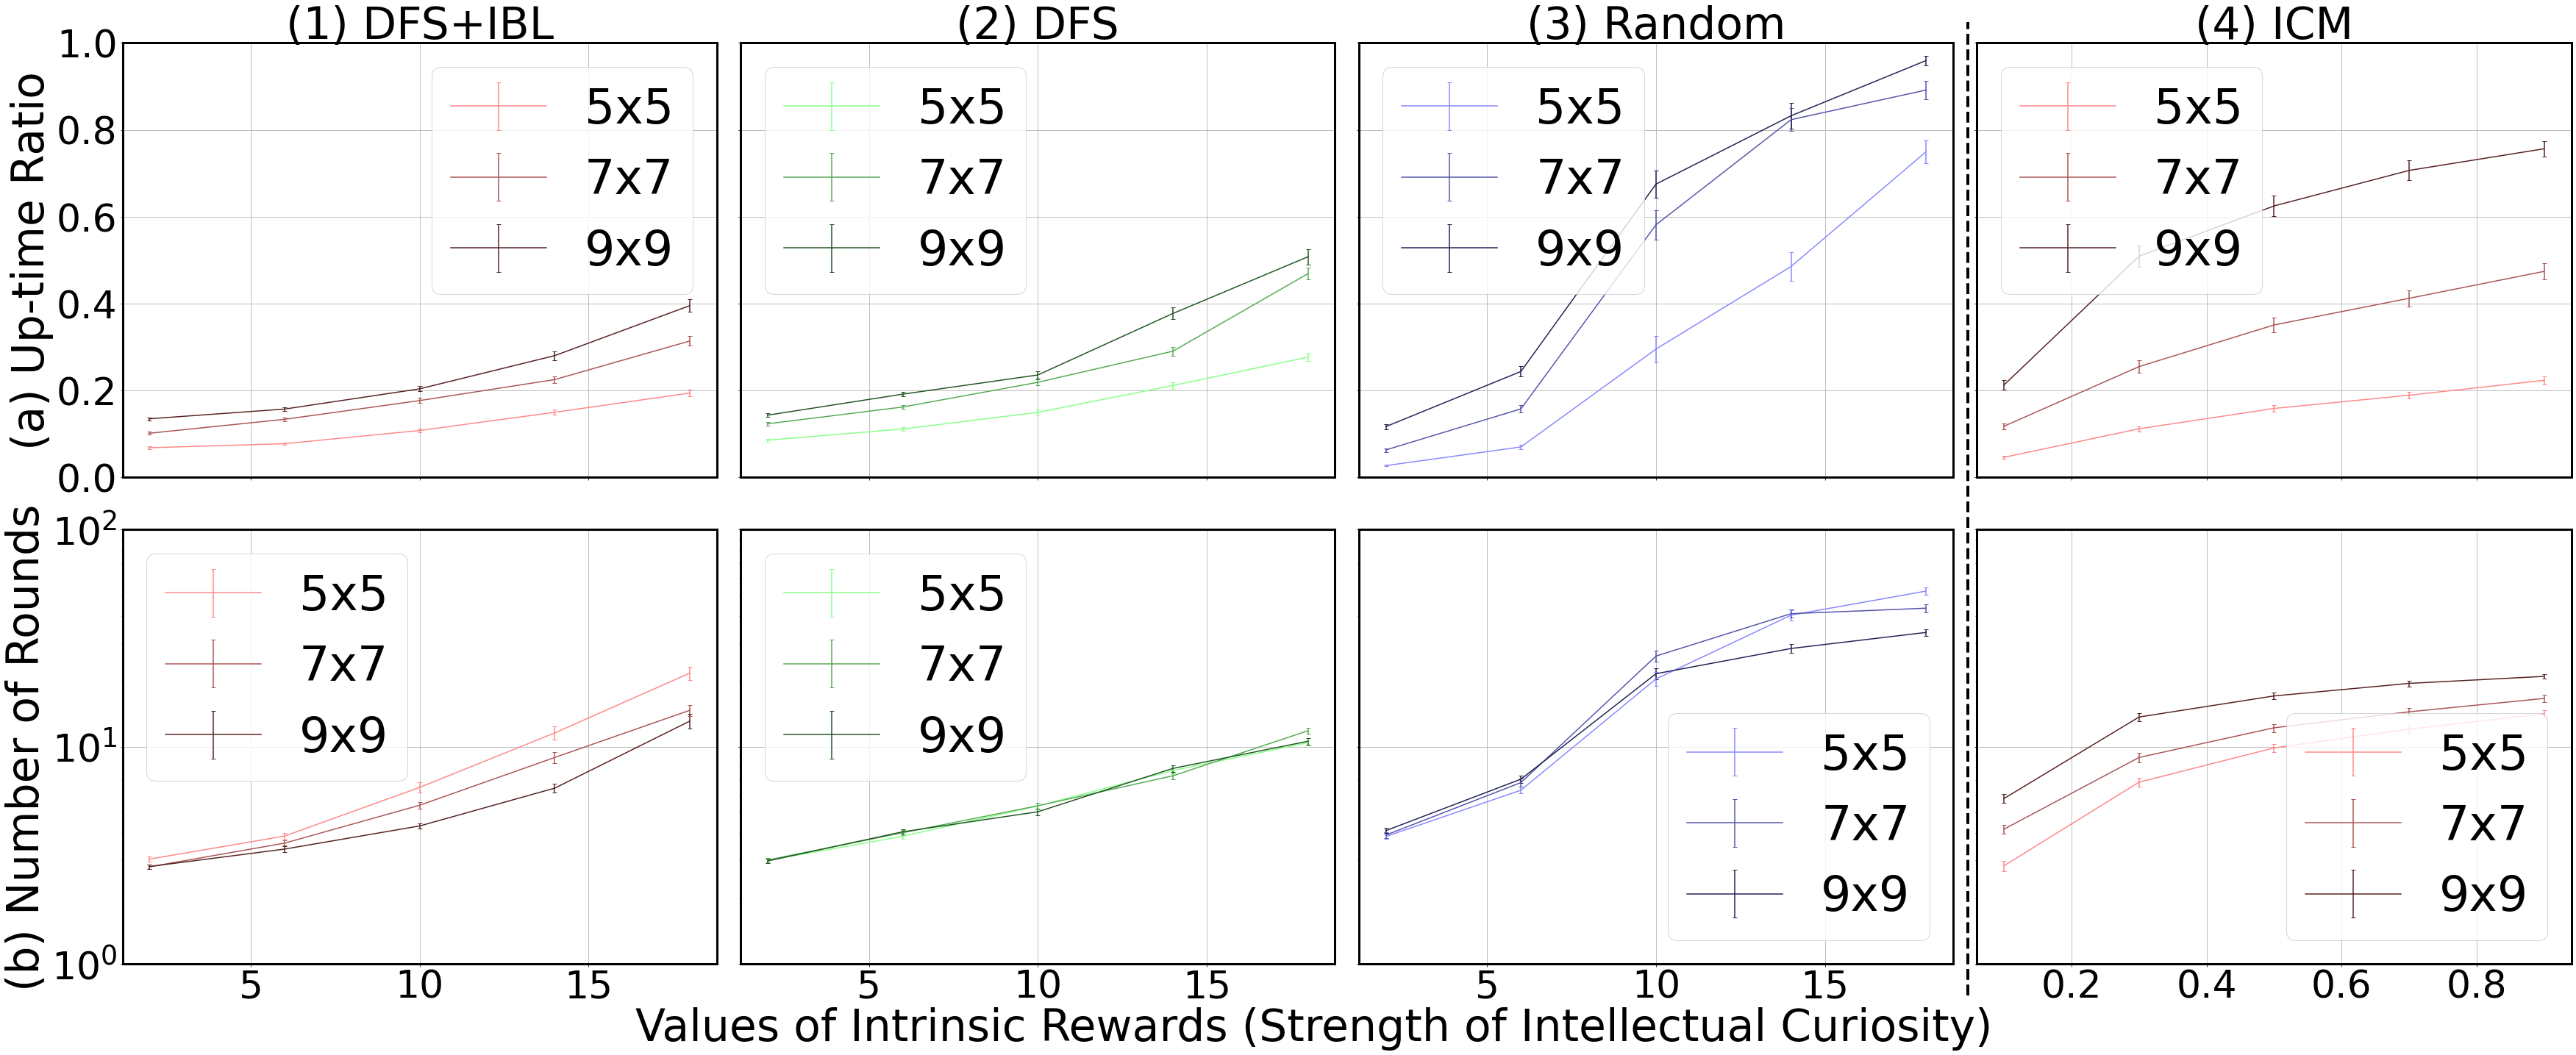

In [21]:
fig = plt.figure(figsize=(10 * 5,10 * 2))
plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.subplot.wspace"] = 0.04
plt.rcParams["figure.subplot.hspace"] = 0.12
fig.subplots_adjust(left=0.05, right=0.975, bottom=0.08, top=0.95)

colors = ['#FF8888', '#AA5555', '#552222']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
ylims = [[0.0,1.0],[1, 100],]
axes = [fig.add_subplot(2, 4, 1), fig.add_subplot(2, 4, 5)]
axes[1].set_yscale('log')
axes[0].set_title('(1) DFS+IBL', fontsize=font_size)
axes[0].set_ylabel('(a) Up-time Ratio', fontsize=font_size)
axes[1].set_ylabel('(b) Number of Rounds', fontsize=font_size)
# for i in range(len(axes)-1):
#     axes[i].set_xticklabels([]) 
for i in range(len(axes)-1):
    axes[i].tick_params(which="both", labelbottom=False)
draw_actr_graphs(df_i, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

colors = ['#88FF88', '#55AA55', '#225522']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
axes = [fig.add_subplot(2, 4, 2), fig.add_subplot(2, 4, 6)]
axes[1].set_yscale('log')
axes[0].set_title('(2) DFS', fontsize=font_size)
for i in range(len(axes)):
    axes[i].tick_params(which="both", labelleft=False)
for i in range(len(axes)-1):
    axes[i].tick_params(which="both", labelbottom=False)
draw_actr_graphs(df_b, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

colors = ['#8888FF', '#5555AA', '#222255']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
axes = [fig.add_subplot(2, 4, 3), fig.add_subplot(2, 4, 7)]
axes[1].set_yscale('log')
axes[0].set_title('(3) Random', fontsize=font_size)
# for i in range(len(axes)-1):
#     axes[i].set_xticklabels([]) 
for i in range(len(axes)):
    axes[i].tick_params(which="both", labelleft=False)
for i in range(len(axes)-1):
    axes[i].tick_params(which="both", labelbottom=False)
draw_actr_graphs(df_r, axes, actr_labels,actr_xlist, rewards, colors, levels, names, ylims)
                 
level = [1, 2, 3]
color = ['#FF8888', '#AA5555', '#552222']
name = ['5x5', '7x7', '9x9']
df = df_rl
ylims = [[0.0,1.0], [1, 100] ]
axes = [fig.add_subplot(2, 4, 4), fig.add_subplot(2, 4, 8)]
axes[1].set_yscale('log')
axes[0].set_title('(4) ICM', fontsize=font_size)
for i in range(len(axes)):
    axes[i].tick_params(which="both", labelleft=False)
for i in range(len(axes)-1):
    axes[i].tick_params(which="both", labelbottom=False)
for ax, label, ylim in zip(axes, rl_labels, ylims):
    for l, c, n in zip(level, color, name):
        draw_conventional_graph(df, ax, c, n, rl_xlist, rewards, label, l,0, 9, 1.0/10, ylim)
        ax.tick_params(labelsize=label_size)    
        ax.legend(fontsize=legend_size)
fig.suptitle('Values of Intrinsic Rewards (Strength of Intellectual Curiosity)',y=0.04, fontsize=font_size)
SetSpines(fig.axes, 3)
fig.add_artist(lines.Line2D([0.747,0.747], [0.05, 0.97], color='k', linestyle='--', linewidth=4))
fig.savefig('simulation1.pdf')

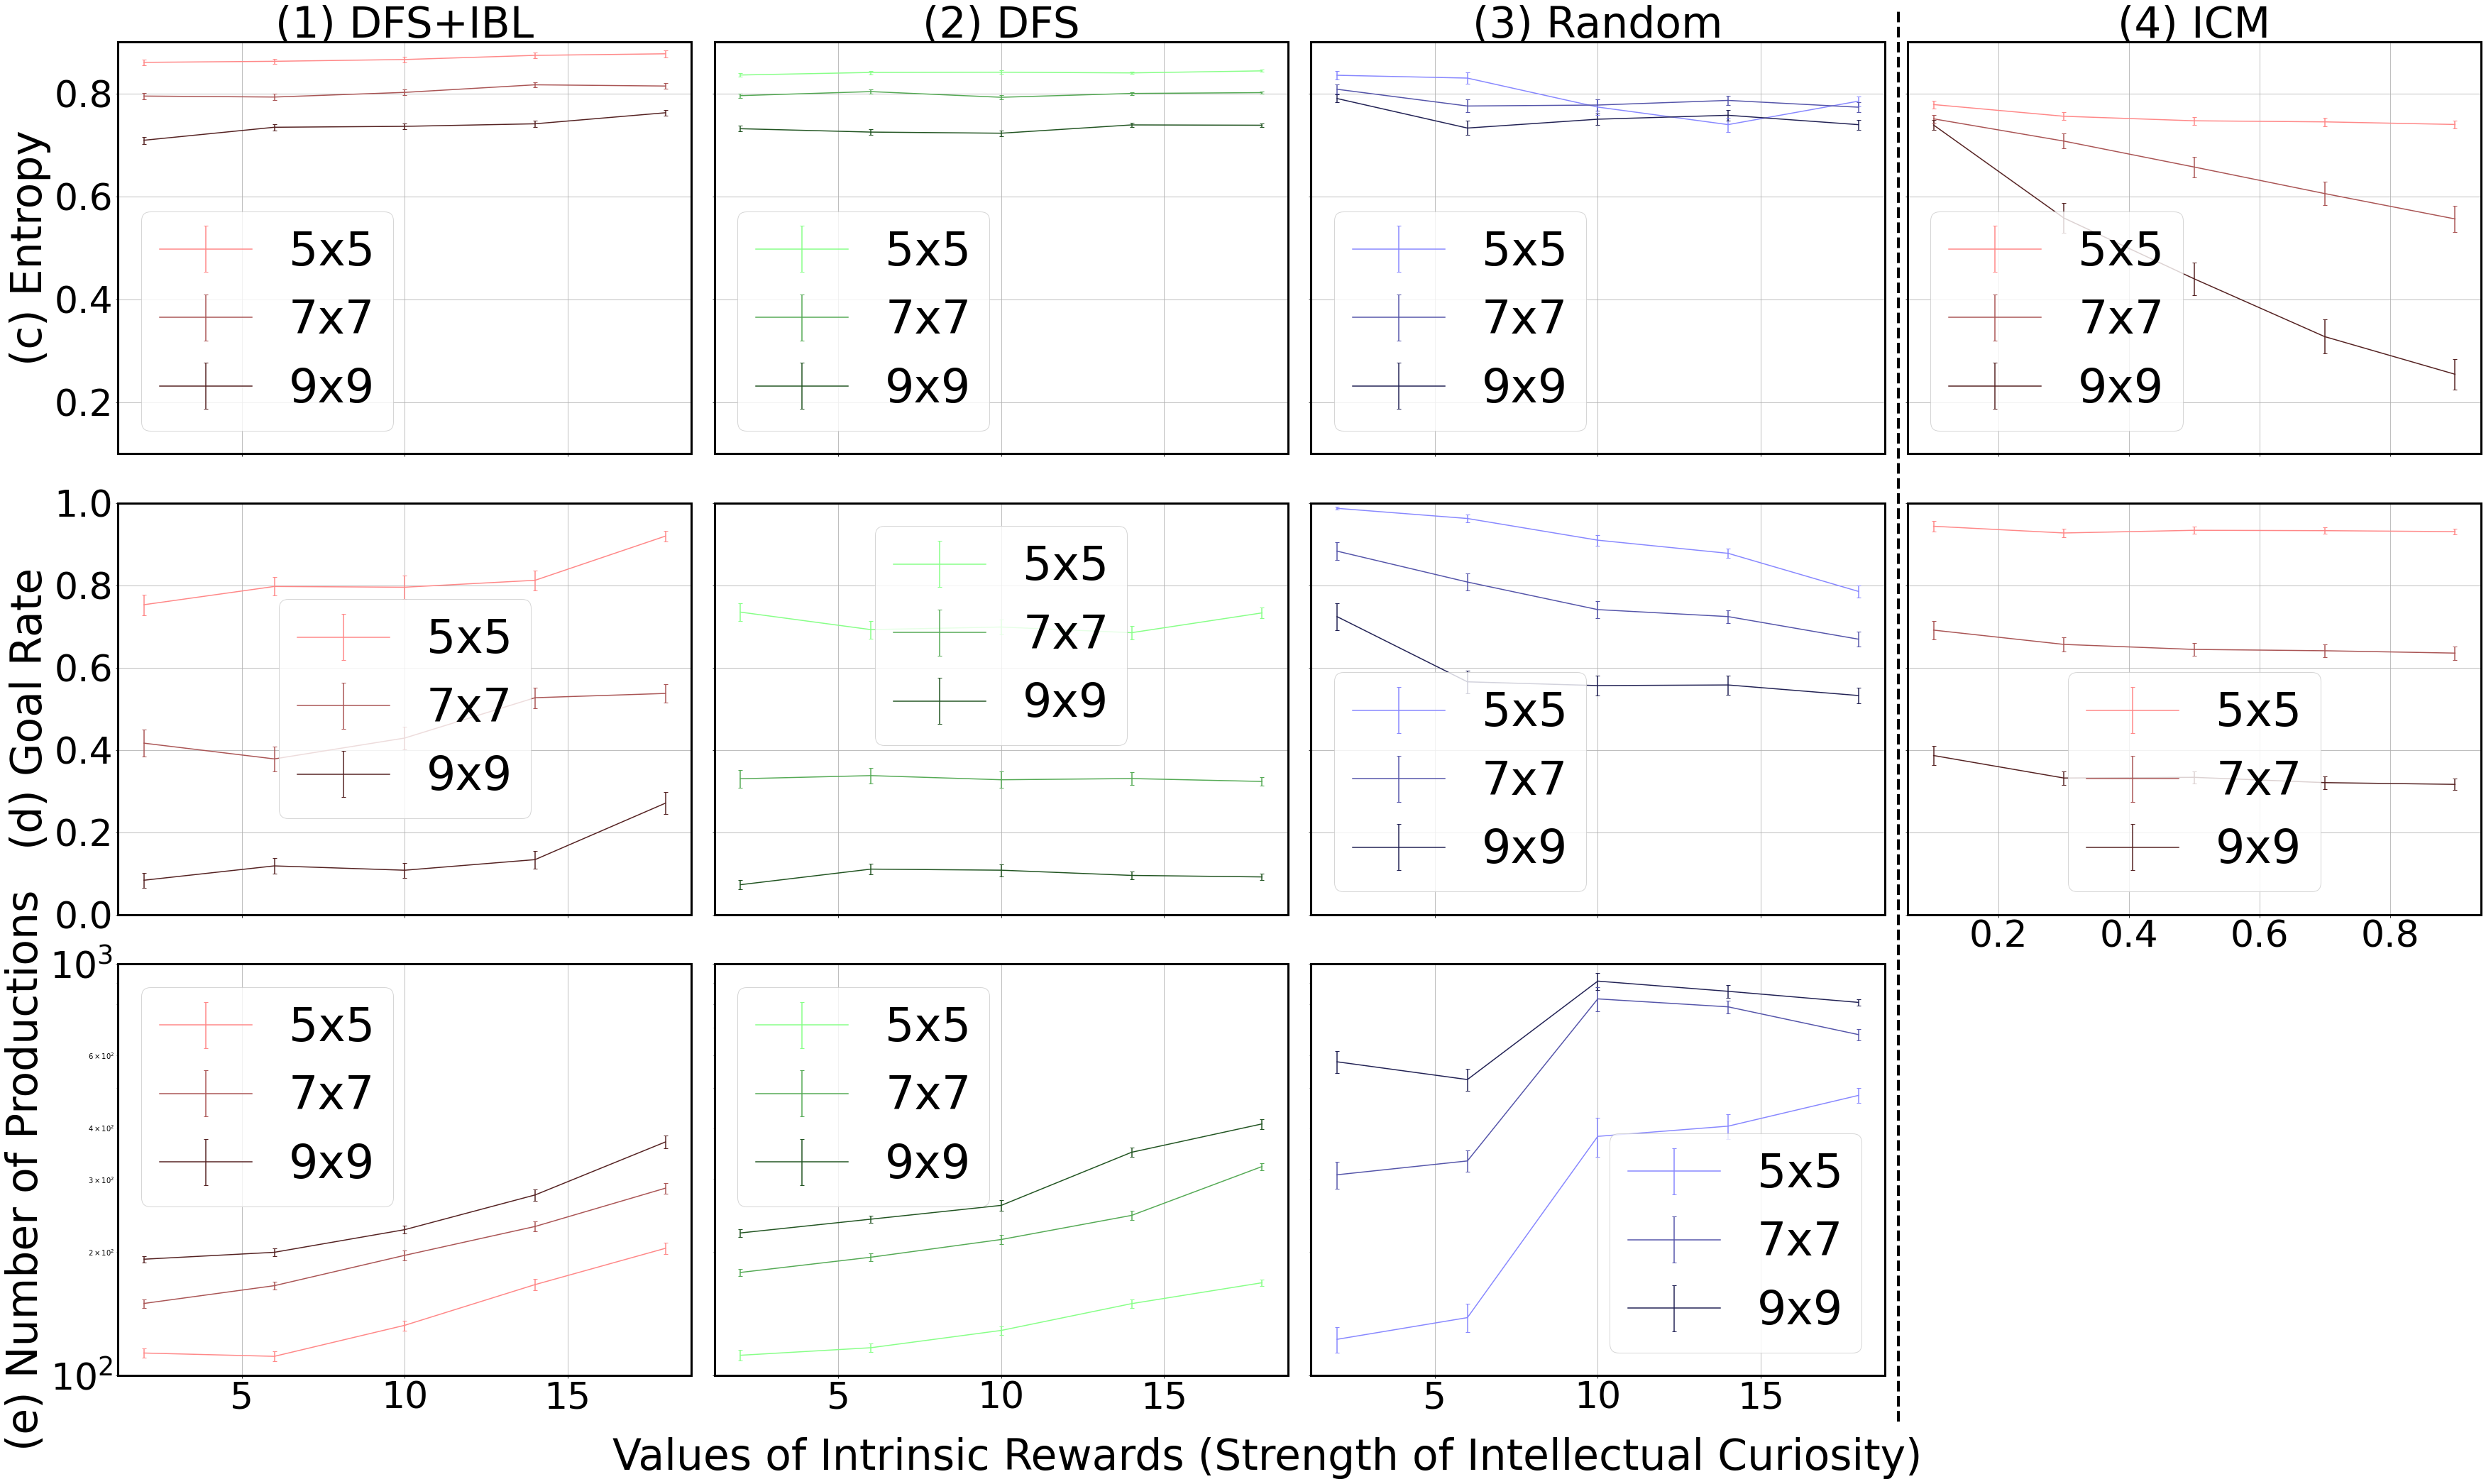

In [22]:
fig = plt.figure(figsize=(10 * 5,10 * 3))
plt.rcParams["figure.autolayout"] = False
plt.rcParams["figure.subplot.wspace"] = 0.04
plt.rcParams["figure.subplot.hspace"] = 0.12
fig.subplots_adjust(left=0.05, right=0.975, bottom=0.08, top=0.95)

colors = ['#FF8888', '#AA5555', '#552222']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
ylims = [[0.1,0.9],[0.0,1.0],[100,1000]]
axes = [fig.add_subplot(3, 4, 1), fig.add_subplot(3, 4, 5), fig.add_subplot(3, 4, 9)]
axes[2].set_yscale('log')
axes[0].set_title('(1) DFS+IBL', fontsize=font_size)
axes[0].set_ylabel('(c) Entropy', fontsize=font_size)
axes[1].set_ylabel('(d) Goal Rate', fontsize=font_size)
axes[2].set_ylabel('(e) Number of Productions', fontsize=font_size)
# for i in range(len(axes)-1):
#     axes[i].set_xticklabels([]) 
for i in range(len(axes)-1):
    axes[i].tick_params(which="both", labelbottom=False)
draw_actr_graphs(df_i, axes, bottom_actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

colors = ['#88FF88', '#55AA55', '#225522']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
axes = [fig.add_subplot(3, 4, 2), fig.add_subplot(3, 4, 6), fig.add_subplot(3, 4, 10)]
axes[2].set_yscale('log')
axes[0].set_title('(2) DFS', fontsize=font_size)
for i in range(len(axes)):
    axes[i].tick_params(which="both", labelleft=False)
for i in range(len(axes)-1):
    axes[i].tick_params(which="both", labelbottom=False)
draw_actr_graphs(df_b, axes, bottom_actr_labels,actr_xlist, rewards, colors, levels, names, ylims)

colors = ['#8888FF', '#5555AA', '#222255']
names = ['5x5', '7x7', '9x9']
levels = [1, 2, 3]
axes = [fig.add_subplot(3, 4, 3), fig.add_subplot(3, 4, 7), fig.add_subplot(3, 4, 11)]
axes[2].set_yscale('log')
axes[0].set_title('(3) Random', fontsize=font_size)
# for i in range(len(axes)-1):
#     axes[i].set_xticklabels([]) 
for i in range(len(axes)):
    axes[i].tick_params(which="both", labelleft=False)
for i in range(len(axes)-1):
    axes[i].tick_params(which="both", labelbottom=False)
draw_actr_graphs(df_r, axes, bottom_actr_labels,actr_xlist, rewards, colors, levels, names, ylims)
                
level = [1, 2, 3]
color = ['#FF8888', '#AA5555', '#552222']
name = ['5x5', '7x7', '9x9']
df = df_rl
ylims = [[0.1,0.9], [0.0,1.0],  ]
axes = [fig.add_subplot(3, 4, 4), fig.add_subplot(3, 4, 8)]
axes[0].set_title('(4) ICM', fontsize=font_size)
for i in range(len(axes)):
    axes[i].tick_params(which="both", labelleft=False)
for i in range(len(axes)-1):
    axes[i].tick_params(which="both", labelbottom=False)
for ax, label, ylim in zip(axes, bottom_rl_labels, ylims):
    for l, c, n in zip(level, color, name):
        draw_conventional_graph(df, ax, c, n, rl_xlist, rewards, label, l,0, 9, 1.0/10, ylim)
        ax.tick_params(labelsize=label_size)    
        ax.legend(fontsize=legend_size)
fig.suptitle('Values of Intrinsic Rewards (Strength of Intellectual Curiosity)',y=0.04, fontsize=font_size)
SetSpines(fig.axes, 3)
fig.add_artist(lines.Line2D([0.747,0.747], [0.05, 0.97], color='k', linestyle='--', linewidth=4))
fig.savefig('simulation2.pdf')